# 01: Data Preprocessing

This code is part of a data preprocessing pipeline for a machine learning project focused on stress detection from wearable devices. The data is obtained from the WESAD dataset and is stored locally.

The code initializes a dataset object by specifying the data path and a list of subject numbers to include. It then extracts preprocessed data for each subject and concatenates them into a single dataframe. Finally, it saves the concatenated data as a CSV file.

This code can be used as a starting point for further analysis and modeling, as it provides a clean and organized dataset for stress detection.

In [1]:
%load_ext autoreload

%autoreload 2

In [4]:
import os
import numpy as np
from synthesizers.preprocessing.wesad import WESADDataset, LabelType

In [6]:
SAMPLING_RATE = 1
DATA_PATH = os.path.realpath("data/WESAD_DATASET")
SUBJECT_NUMS = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17]

wesad_dataset = WESADDataset(DATA_PATH, SUBJECT_NUMS)

# Get concatenated preprocessed data for all subjects as a single dataframe

wesad_windows, wesad_labels = wesad_dataset.get_all_data_and_windows(
    sampling_rate=SAMPLING_RATE,
    normalize=True,
    window_function=WESADDataset.sliding_windows,
    label_type=LabelType.MOST_COMMON
)

wesad_windows.shape, wesad_labels.shape

((1083, 60, 7), (1083,))

Save preprocessed windows and corresponding labels

In [7]:
np.save('data/wesad/wesad_windows.npy', wesad_windows)
np.save('data/wesad/wesad_labels.npy', wesad_labels)

### Data Exploration

#### Plotting

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
subject4 = wesad_dataset.subjects[4].get_subject_dataframe(sampling_rate=SAMPLING_RATE, normalize=True)

In [11]:
subject4

,BVP,EDA,ACC_x,ACC_y,ACC_z,TEMP,label
0,0.554880,0.040654,0.964974,0.433740,1.000000,0.498794,0
1,0.603691,0.039758,0.382778,0.324996,0.878621,0.470248,0
2,0.494728,0.037777,0.141155,0.508231,0.809936,0.508917,0
3,0.469107,0.036853,0.237489,0.475105,0.853457,0.514205,0
4,0.528736,0.036609,0.247706,0.511993,0.855308,0.507148,0
...,...,...,...,...,...,...,...
2160,0.839419,0.681773,0.668192,0.942187,0.610383,0.000000,1
2161,0.709568,0.707206,0.672419,0.957560,0.512561,0.011784,1
2162,0.535497,0.702067,0.686043,0.953753,0.551790,0.050738,1
2163,0.673123,0.691380,0.838136,0.981327,0.452688,0.018813,1


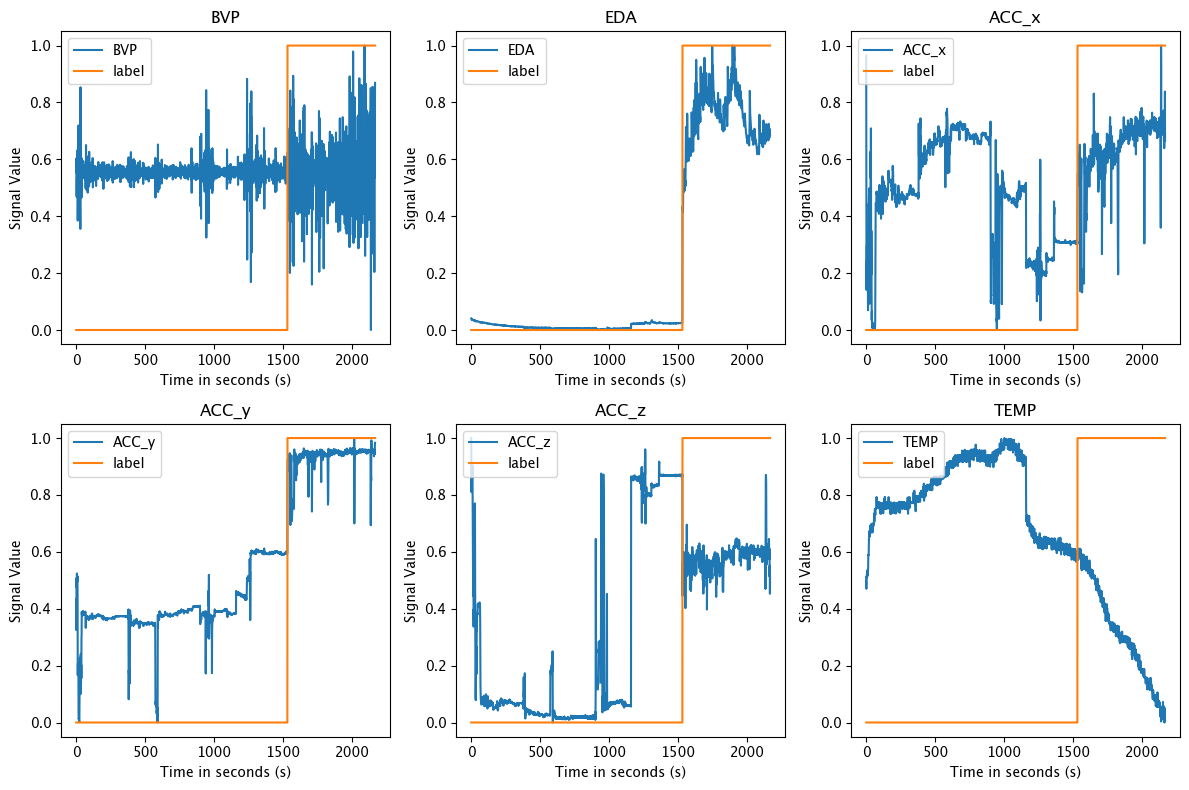

In [12]:
signals = ['BVP', 'EDA', 'ACC_x', 'ACC_y', 'ACC_z', 'TEMP']
labels = subject4['label']

# Calculate the number of rows and columns for the subplots
num_rows = 2
num_cols = 3
num_plots = num_rows * num_cols

# Create a figure and subplots with the specified number of rows and columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Iterate over each signal and create a subplot for it
for i, signal in enumerate(signals):
    ax = axes[i]
    ax.plot(subject4.index, subject4[[signal, 'label']], label = [signal, 'label'])
    ax.set_title(signal)
    ax.set_xlabel('Time in seconds (s)')
    ax.set_ylabel('Signal Value')

    ax.legend(loc="upper left")


plt.tight_layout()
plt.savefig("plots/s4_signals.pdf", format="pdf", bbox_inches="tight")
plt.show()


In [14]:
mos = wesad_windows[wesad_labels == 1] # mos stands for moment of stress
non_mos = wesad_windows[wesad_labels == 0] # non_mos stands for non moment of stress
mos.shape, non_mos.shape

((320, 60, 7), (763, 60, 7))

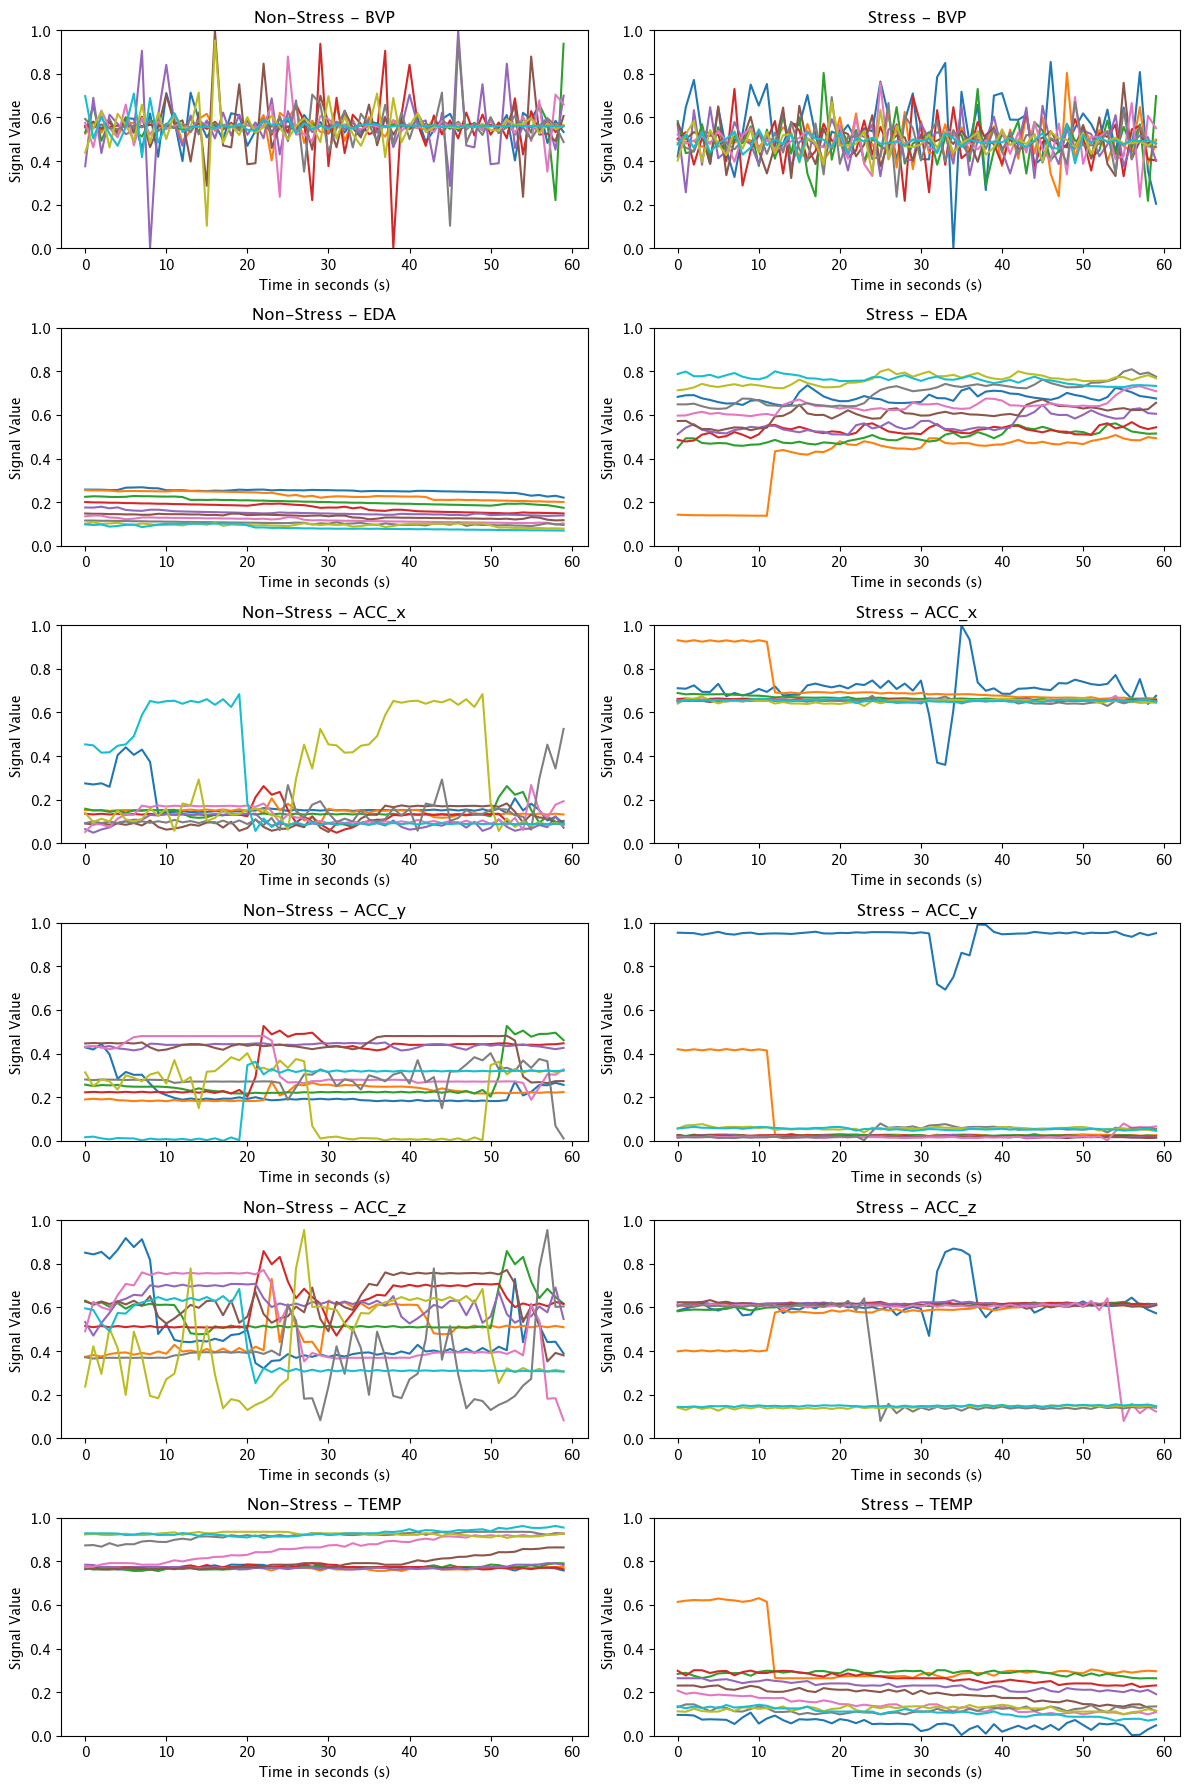

In [15]:
num_samples = 10
mos_signals = mos[60:60+num_samples, :, :]
non_mos_signals = non_mos[60:60+num_samples, :, :]

# Create a figure and axes for the plots
fig, axes = plt.subplots(6, 2, figsize=(12, 18))
axes = axes.flatten()

for i in range(6):
    ax1 = axes[i*2]  # Column 1 for non-mos
    ax2 = axes[i*2+1]  # Column 2 for mos

    for j in range(num_samples):  # Plotting 10 samples per signal
        ax1.plot(non_mos_signals[j, :, i], label=f'Sample {j+60}')
        ax2.plot(mos_signals[j, :, i], label=f'Sample {j+60}')

    ax1.set_title(f'Non-Stress - {signals[i]}')
    ax1.set_xlabel('Time in seconds (s)')
    ax1.set_ylabel('Signal Value')
    ax1.set_ylim([0, 1])  # Set the y-axis limit from 0 to 1
    # ax1.legend(loc="upper right")

    ax2.set_title(f'Stress - {signals[i]}')
    ax2.set_xlabel('Time in seconds (s)')
    ax2.set_ylabel('Signal Value')
    ax2.set_ylim([0, 1])  # Set the y-axis limit from 0 to 1
    # ax2.legend(loc="upper right")

plt.tight_layout()
plt.savefig("plots/s4_signals_windows.pdf", format="pdf", bbox_inches="tight")
plt.show()


In [16]:
wesad_dataframe = wesad_dataset.get_all_data(sampling_rate=SAMPLING_RATE, normalize=True)
wesad_dataframe.describe()

,BVP,EDA,ACC_x,ACC_y,ACC_z,TEMP,label
count,33152.000000,33152.000000,33152.000000,33152.000000,33152.000000,33152.000000,33152.000000
mean,0.520963,0.282627,0.604532,0.431258,0.533002,0.591722,0.300615
std,0.089339,0.298109,0.252384,0.245809,0.244688,0.306322,0.458533
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.463821,0.037243,0.406316,0.264248,0.380582,0.338131,0.000000
50%,0.523659,0.163028,0.654444,0.408181,0.543719,0.644072,0.000000
75%,0.575560,0.462886,0.814149,0.563425,0.733204,0.876643,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


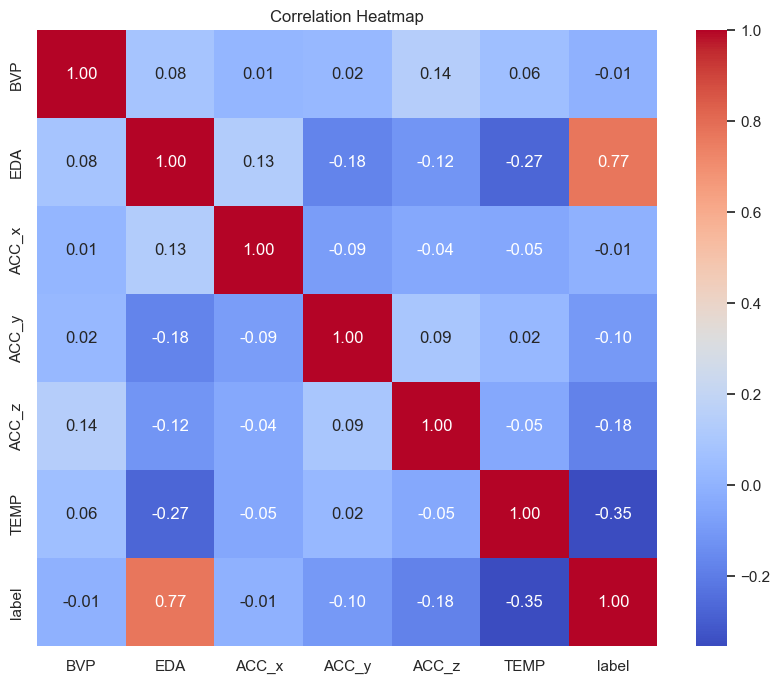

In [13]:
# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(wesad_dataframe.corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.savefig('plots/signal_correlation.png', dpi=300)
plt.show()

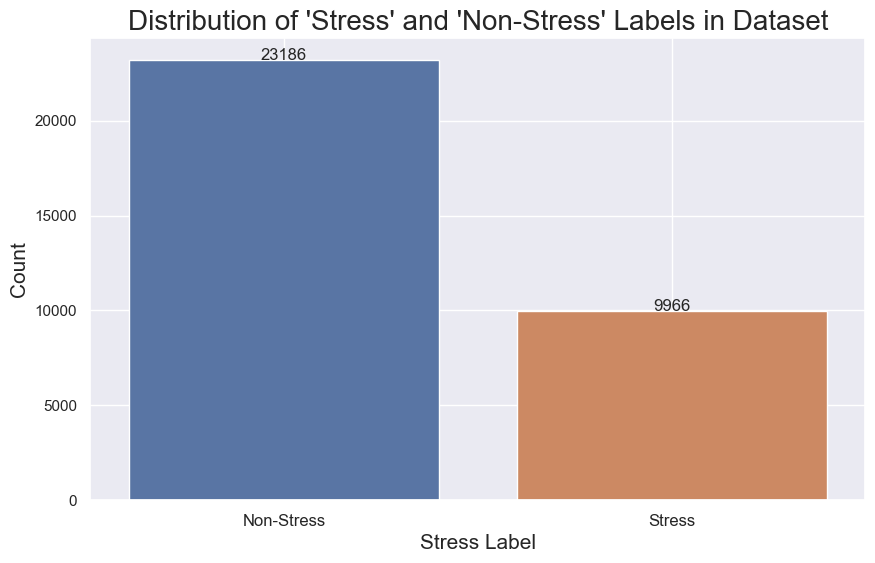

In [21]:
sns.set(style="darkgrid")

plt.figure(figsize=(10, 6))

ax = sns.countplot(x='label', data=wesad_dataframe)

plt.title("Distribution of 'Stress' and 'Non-Stress' Labels in Dataset", fontsize=20)
plt.xlabel('Stress Label', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks([0, 1], ['Non-Stress', 'Stress'], fontsize=12)

# Add gridlines
plt.grid(True)


for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2), 
            y = height, 
            s = '{:.0f}'.format(height), 
            ha = 'center')

plt.savefig('plots/dataset_distribution.png', dpi=300)
plt.show()
